In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

from io import StringIO
import requests
import xml.etree.ElementTree as etree

from svgpath2mpl import parse_path

In [2]:
def fetch_path(svg_url):
    r = requests.get(svg_url)
    root = etree.parse(StringIO(r.text)).getroot()
    view_box = root.attrib.get('viewBox')
    if view_box is not None:
        view_box = [int(x) for x in view_box.split()]
        xlim = (view_box[0], view_box[0] + view_box[2])
        ylim = (view_box[1] + view_box[3], view_box[1])
    else:
        xlim = (0, 500)
        ylim = (500, 0)
    path_elem = root.findall('.//{http://www.w3.org/2000/svg}path')[0]
    return xlim, ylim, parse_path(path_elem.attrib['d'])

In [9]:
with open('img/fontawesome-regular.txt', 'rt') as f:
    urls = [
        'https://raw.githubusercontent.com/FortAwesome/Font-Awesome/master/svgs/regular/' + filename.strip()
        for filename in f
    ]

contents = [fetch_path(url) for url in urls]

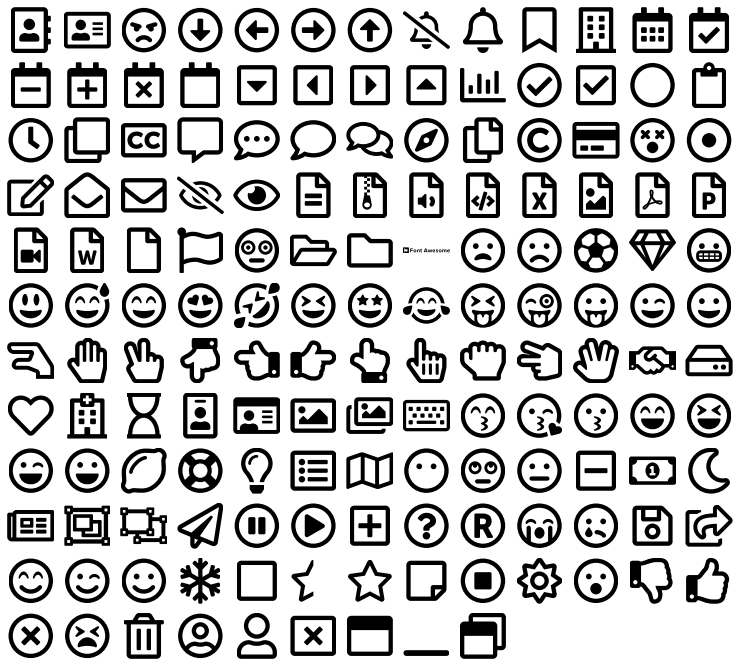

In [10]:
plt.figure(figsize=(13, 13))
gs = plt.GridSpec(nrows=13, ncols=13)
for i, (xlim, ylim, path) in enumerate(contents):
    ax = plt.subplot(gs[i])
    patch = PathPatch(path, lw=1, edgecolor="none", facecolor="#000000")
    ax.add_patch(patch)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect(1)
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [11]:
with open('img/fontawesome-brands.txt', 'rt') as f:
    urls = [
        'https://raw.githubusercontent.com/FortAwesome/Font-Awesome/master/svgs/brands/' + filename.strip()
        for filename in f
    ]

contents = [fetch_path(url) for url in urls]

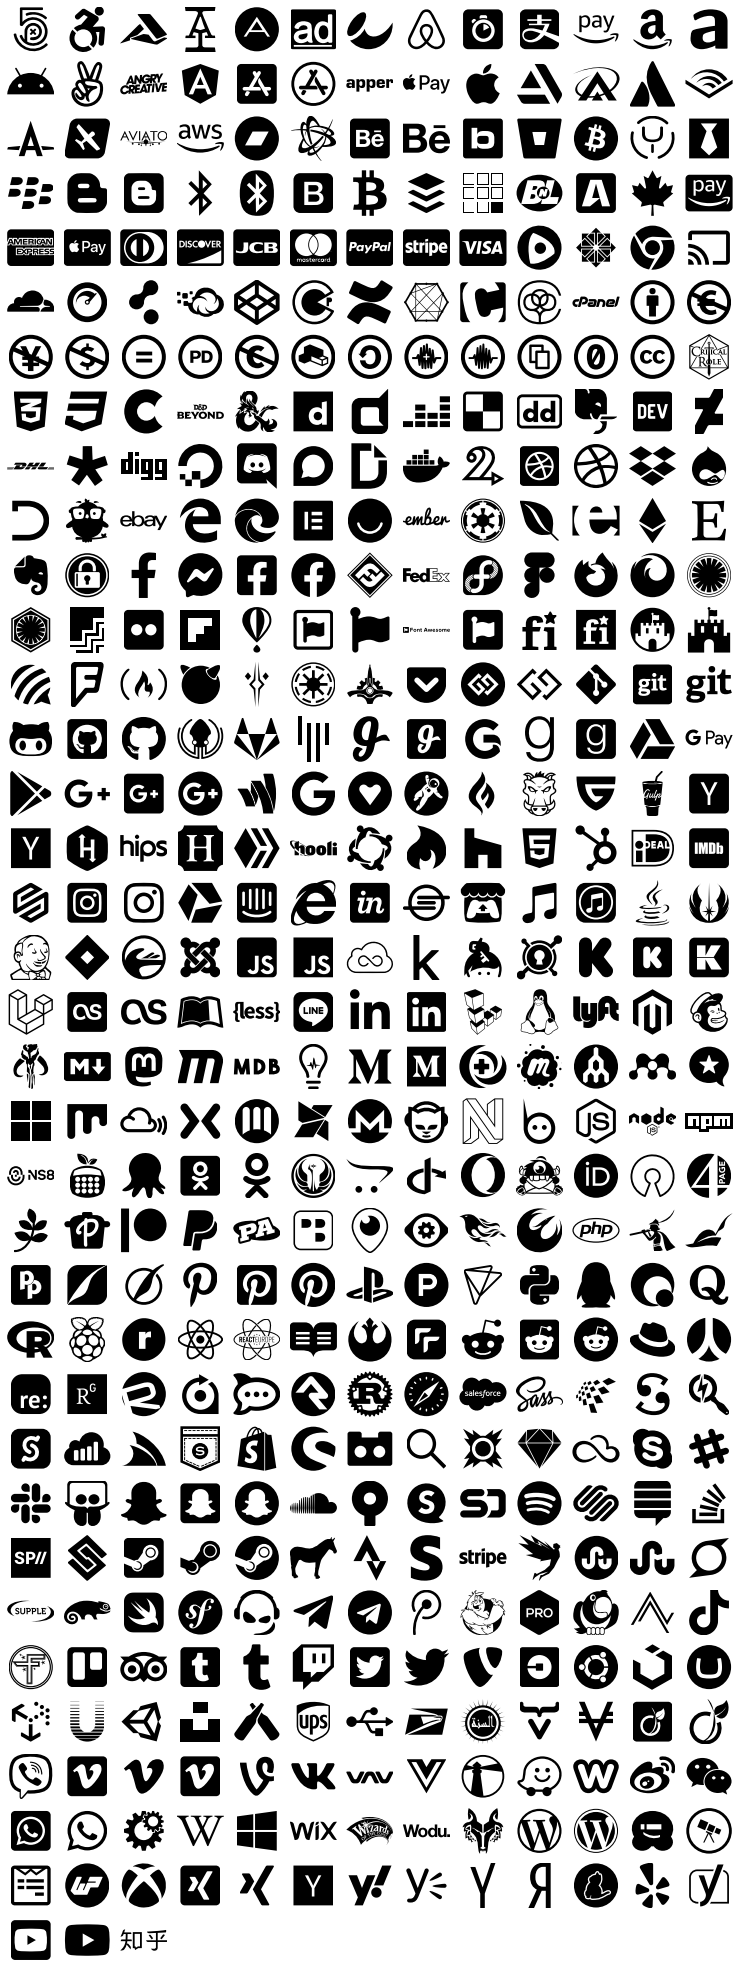

In [12]:
plt.figure(figsize=(13, 39))
gs = plt.GridSpec(nrows=39, ncols=13)
for i, url in enumerate(urls):
    xlim, ylim, path = fetch_path(url)
    ax = plt.subplot(gs[i])
    patch = PathPatch(path, lw=1, edgecolor="none", facecolor="#000000")
    ax.add_patch(patch)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect(1)
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)